In [7]:
from google.colab import drive
drive.mount('./gdrive')

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


Mounted at ./gdrive

In [4]:
!cp /content/gdrive/MyDrive/Information-Retrival/datasets /content -r

In [5]:
import numpy as np, pandas as pd, pickle


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

**Data Preprocessing**

In [ ]:
paperDf = pd.read_csv("./datasets/Train.csv")
# paperDf.drop('id', axis = 1, inplace = True)
paperDf

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**One hot encoding to label encoding**

In [ ]:
def convertOneHotToLabel(df):
    labels = []

    cols = df.columns[2:]

    for ind, row in df.iterrows():

        for ind, val in enumerate(cols):
            if row[val] == 1:
                labels.append(val)
                break

    df['subject'] = labels

convertOneHotToLabel(paperDf)

paperDf.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,subject
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Physics
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Physics
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Science


**Remove all columns between Abstract and Subject**

In [ ]:
newDf = paperDf.drop(paperDf.columns[2:-1], axis = 1)
newDf.drop('id', axis = 1, inplace = True)
newDf.to_csv("/content/gdrive/MyDrive/Information-Retrival/datasets/label-encoded.csv", index=False)

newDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


**Working with new Dataset**

In [ ]:
paperDf = pd.read_csv("/content/gdrive/MyDrive/Information-Retrival/datasets/label-encoded.csv")
# paperDf.drop('id', axis = 1, inplace = True)
paperDf

,ABSTRACT,subject
0,a ever-growing datasets inside observational a...,Physics
1,we propose the framework considering optimal $...,Computer Science
2,nanostructures with open shell transition meta...,Physics
3,stars are self-gravitating fluids inside which...,Physics
4,deep neural perception and control networks ar...,Computer Science
...,...,...
13999,a methodology of automatic detection of a even...,Computer Science
14000,we consider a case inside which the robot has ...,Computer Science
14001,despite being usually considered two competing...,Physics
14002,we present the framework and its implementatio...,Computer Science


In [ ]:
# pipeline class for stemming
import re, nltk, numpy as np, spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.base import BaseEstimator, TransformerMixin
nltk.download('stopwords')
nltk.download('punkt')

class Lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatized_text = []
        for text in X:
            content = re.sub('[^a-zA-Z]',' ', text)
            content = content.lower().split()
            # content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

            content = [word for word in content if text not in stopwords.words('english')]
            content = ' '.join(content)

            lemmas = [token.lemma_ for token in self.nlp(content)]
            lemmatized_text.append(" ".join(lemmas))
        return lemmatized_text

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

class Stemmer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.port_stem = PorterStemmer()
        

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        stemmed_X = []

        for content in X:
            stemmed_content = re.sub('[^a-zA-Z]',' ',content)
            stemmed_content = stemmed_content.lower()
            stemmed_content = stemmed_content.split()
            stemmed_content = [self.port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
            stemmed_content = ' '.join(stemmed_content)
            stemmed_X.append(stemmed_content)
        return np.asarray(stemmed_X)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# measuring the execution time of a code cell
%%timeit
Lemmatizer().fit_transform([newDf['ABSTRACT'][0]])

1.12 s ± 288 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
Stemmer().fit_transform([newDf['ABSTRACT'][0]])

48.8 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Stemming is much faster than lemmatizing**

In [ ]:
newDf['stem_abstract'] = Stemmer().fit_transform(newDf['ABSTRACT'])
newDf

,ABSTRACT,subject,stem_abstract
0,a ever-growing datasets inside observational a...,Physics,ever grow dataset insid observ astronomi chall...
1,we propose the framework considering optimal $...,Computer Science,propos framework consid optim match exclud pre...
2,nanostructures with open shell transition meta...,Physics,nanostructur open shell transit metal molecula...
3,stars are self-gravitating fluids inside which...,Physics,star self gravit fluid insid pressur buoyanc r...
4,deep neural perception and control networks ar...,Computer Science,deep neural percept control network like key c...
...,...,...,...
13999,a methodology of automatic detection of a even...,Computer Science,methodolog automat detect event basi inform op...
14000,we consider a case inside which the robot has ...,Computer Science,consid case insid robot navig insid unknown en...
14001,despite being usually considered two competing...,Physics,despit usual consid two compet phenomena charg...
14002,we present the framework and its implementatio...,Computer Science,present framework implement reli natur languag...


In [ ]:
newDf.to_csv("/content/gdrive/MyDrive/Information-Retrival/datasets/label-encoded.csv", index=False)

**Splitting data as X and Y**

In [ ]:
X = newDf['stem_abstract']
X[:10]

0    ever grow dataset insid observ astronomi chall...
1    propos framework consid optim match exclud pre...
2    nanostructur open shell transit metal molecula...
3    star self gravit fluid insid pressur buoyanc r...
4    deep neural percept control network like key c...
5    analyz job hop behavior import consid understa...
6    need reason uncertainti insid larg complex mul...
7    period approxim one central topic insid astron...
8    nowaday data compressor appli mani problem tex...
9    insid work mani bodi potenti nb consid radiat ...
Name: stem_abstract, dtype: object

In [ ]:
# label encode Y
lc = LabelEncoder()
Y = lc.fit_transform(paperDf['subject'])

print("Labelled classes ", lc.classes_)
Y[:10]

Labelled classes  ['Computer Science' 'Mathematics' 'Physics' 'Statistics']


array([2, 0, 2, 2, 0, 0, 3, 2, 0, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(f"Train size : {len(X_train)}")
print(f"Test size : {len(X_test)}")


Train size : 10503
Test size : 3501


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)

X_train_vec


<10503x22200 sparse matrix of type '<class 'numpy.float64'>'
	with 731622 stored elements in Compressed Sparse Row format>

In [ ]:
df2 = pd.DataFrame(X_train_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names_out())

print(f"Number of features : {df2.shape[1]}")
df2

Number of features : 10503


,0,1,2,3,4,5,6,7,8,9,...,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwitterion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwittterion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zygmund,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
# save vectorizer
with open("/content/gdrive/MyDrive/Information-Retrival/models/vectorizer.pkl", "wb") as f:
    f.write(pickle.dumps(vectorizer))


In [ ]:
# model metrics
import pickle

def loadModels(modelPath, vectorizerPath):
    with open(modelPath, "rb") as f:
        model = pickle.load(f)

    with open(vectorizerPath, "rb") as f:
        vectorizer = pickle.load(f)
    return model, vectorizer

def showMetrics(testData, truths, model):

    preds = model.predict(testData)
    cm = confusion_matrix(truths, preds)

    names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

    print("Prediction Sample : ", preds)

    print("Confusion Matrix")
    print(cm)
    print("Classification report")
    print(classification_report(truths, preds) )

    print("\nAccuracy : ", accuracy_score(truths, preds))
    print("Precision : ", precision_score(truths, preds, average='micro'))
    print("Recall : ", recall_score(truths, preds, average='micro'))
    
    # plt.figure(figsize=(12, 12))
    ax = sns.heatmap(cm, annot=True, fmt='d')
    
    ax.set(title = "HeatMap of Predictions", xlabel="Predicted", ylabel="Truth")
    
    # ax.set_xticklabels(names)
    # ax.set_yticklabels(names)

    plt.show()

def predictSubject(X_test, y_test, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(X_test)
    X = vectorizer.transform(stemmed_data.astype('U'))
    
    if y_test is not None:
        showMetrics(X, y_test, model)  
    
def predictUnseen(data, modelPath, vectorizerPath):
    model, vectorizer = loadModels(modelPath, vectorizerPath)

    stemmed_data = Stemmer().fit_transform(data)
    X = vectorizer.transform(stemmed_data.astype('U'))

    return model.predict(X)    




In [ ]:
# create a custom sklearn model
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train_vec, y_train)

with open("/content/gdrive/MyDrive/Information-Retrival/models/forest.pkl", "wb") as f:
    f.write(pickle.dumps(randomForest))

randomForest

RandomForestClassifier()

Prediction Sample :  [0 0 0 ... 2 0 2]
Confusion Matrix
[[1421   34   12    2]
 [ 121  476   12   11]
 [  50   13  842    0]
 [ 464   19   15    9]]
Classification report
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1469
           1       0.88      0.77      0.82       620
           2       0.96      0.93      0.94       905
           3       0.41      0.02      0.03       507

    accuracy                           0.78      3501
   macro avg       0.73      0.67      0.65      3501
weighted avg       0.75      0.78      0.73      3501


Accuracy :  0.7849185946872322
Precision :  0.7849185946872322
Recall :  0.7849185946872322


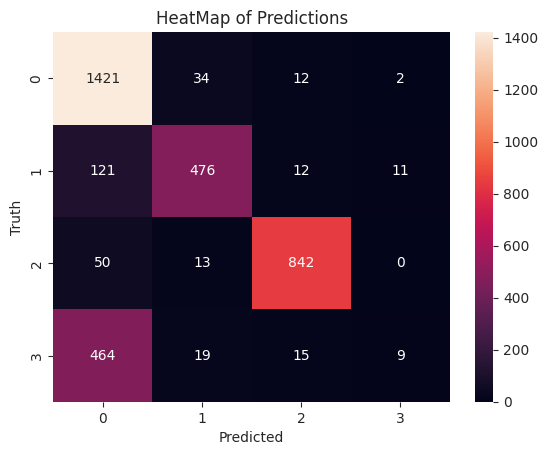

In [ ]:
predictSubject(X_test, y_test, 
           "/content/gdrive/MyDrive/Information-Retrival/models/forest.pkl",
          "/content/gdrive/MyDrive/Information-Retrival/models/vectorizer.pkl")

In [ ]:
# create a custom sklearn pipeline
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_vec, y_train)

with open("/content/gdrive/MyDrive/Information-Retrival/models/svm.pkl", "wb") as f:
    f.write(pickle.dumps(svm))

svm

SVC()

Prediction Sample :  [0 0 0 ... 2 3 2]
Confusion Matrix
[[1388   36    8   37]
 [  69  519    7   25]
 [  19   12  865    9]
 [ 318   33    7  149]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1469
           1       0.86      0.84      0.85       620
           2       0.98      0.96      0.97       905
           3       0.68      0.29      0.41       507

    accuracy                           0.83      3501
   macro avg       0.82      0.76      0.77      3501
weighted avg       0.83      0.83      0.82      3501


Accuracy :  0.834333047700657
Precision :  0.834333047700657
Recall :  0.834333047700657


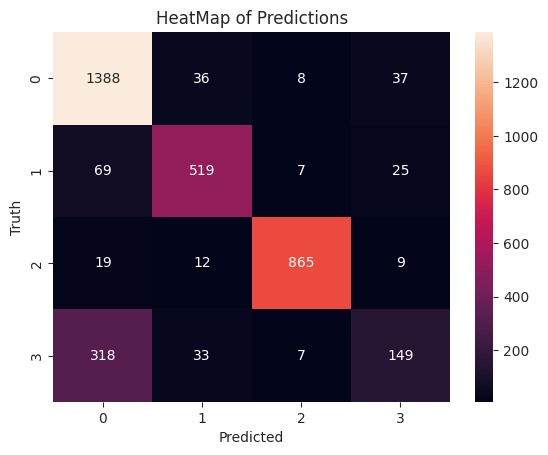

In [ ]:
predictSubject(X_test, y_test, 
            "/content/gdrive/MyDrive/Information-Retrival/models/svm.pkl",
           "/content/gdrive/MyDrive/Information-Retrival/models/vectorizer.pkl")

**Testing Coventry data**

In [ ]:
papers = pd.read_json("/content/gdrive/MyDrive/Information-Retrival/papers1.json")

papers.head()

,link,title,journal,journalLink,date,volume,pages,numberofpages,type_classification,doi,authors,tags,coventryAuthors,abstract
0,https://pureportal.coventry.ac.uk/en/publicati...,Associations between sleep-related heart rate ...,Associations between sleep-related heart rate ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,101,106-117,12.0,Review article,https://doi.org/10.1016/j.sleep.2022.10.018,"[Arron Taylor Lund Correia, Gosia Lipinska, H....","[Anxiety, Autonomic nervous system, Depression...",[https://pureportal.coventry.ac.uk/en/persons/...,There is a bidirectional relationship between ...
1,https://pureportal.coventry.ac.uk/en/publicati...,A stochastic model of edge-localized modes in ...,A stochastic model of edge-localized modes in ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-20,381,NaN,16.0,Article,https://doi.org/10.1098/rsta.2021.0226,"[Eun-jin Kim, Rainer Hollerbach]","[High-confinement mode, statistical theory, se...",[https://pureportal.coventry.ac.uk/en/persons/...,Magnetically confined plasmas are far from equ...
2,https://pureportal.coventry.ac.uk/en/publicati...,A study on the effects of laser shock peening ...,A study on the effects of laser shock peening ...,https://pureportal.coventry.ac.uk/en/publicati...,2023-07-01,316,NaN,11.0,Article,https://doi.org/10.1016/j.jmatprotec.2023.117959,"[J. R.O. Leo, S. Zabeen, M. E. Fitzpatrick, J....","[Ti-6Al-4V, Powder bed fusion, Laser shock pee...",[https://pureportal.coventry.ac.uk/en/persons/...,Ti‐6Al‐4V was fabricated by powder-bed fusion ...
3,https://pureportal.coventry.ac.uk/en/publicati...,A systematic review of factors leading to occu...,A systematic review of factors leading to occu...,https://pureportal.coventry.ac.uk/en/publicati...,2023-01-01,31,99-113,15.0,Review article,https://doi.org/10.1007/s10389-020-01427-4,"[Joana Eva Dodoo, Hosam Al-Samarraie]","[Occupational safety, Organizational factors, ...",[],Purpose: The burden of health and safety relat...
4,https://pureportal.coventry.ac.uk/en/publicati...,A Systematic Review of In-Vehicle Physiologica...,A Systematic Review of In-Vehicle Physiologica...,https://pureportal.coventry.ac.uk/en/publicati...,2023-02-16,23,NaN,18.0,Review article,https://doi.org/10.3390/s23042214,"[Ashwini Kanakapura Sriranga, Qian Lu, Stewart...","[HR, HRV, conditional automation, mental workl...",[https://pureportal.coventry.ac.uk/en/persons/...,The concept of vehicle automation ceases to se...


In [ ]:
ind = 300
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['FMCW', 'CNN', 'Radar', 'Transfer Learning', 'Classification', 'Vehicle safety', 'Vehicle occupancy']


'Vehicle Occupant Detection has gathered attention with the advancement of Connected Automated Vehicles (CAVs) since it enhances vehicular safety features and contributes to Vehicle-to-Everything (V2X) communication features. In this paper, a novel Frequency Modulated Continuous Wave (FMCW) radar-based occupancy detection utilizing Convolutional Neural Networks (CNN) is introduced. The proposed methodology tackles disadvantages posed by visual and sensor-based methods when privacy, computational complexity, line-of-sight requirements, and robustness are concerned. The system uses time-domain raw radar data signals to form visual heatmaps based on signal intensity variation caused by presence of a target. The heatmaps developed for each data frame acts as an input to the neural network. Visually generated signal based heatmaps differentiate three classes of vehicle occupancy: vacant, driver seat and rear passenger occupancy. The adapted CNN architecture is an implementation of transfer 

In [ ]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], '/content/gdrive/MyDrive/Information-Retrival/models/forest.pkl', '/content/gdrive/MyDrive/Information-Retrival/models/vectorizer.pkl')
names[pred[0]]

'Computer Science'

In [ ]:
ind = 400
print(papers.iloc[ind].tags)
papers.iloc[ind].abstract

['solar organic supercapacitor', 'ANFIS', 'electric vehicle', 'solar energy', 'renewable energy']


'Innovations are required for electric vehicles (EVs) to be lighter and more energy efficient due to the range anxiety issue. This article introduces an intelligent control of an organic structure solar supercapacitor (OSSC) for EVs to meet electrical load demands with solar renewable energy. A carbon fibre-reinforced polymer, nano zinc oxide (ZnO), and copper oxide (CuO) fillers have been used in the development of OSSC prototypes. The organic solar cell, electrical circuits, converter, controller, circuit breaker switch, and batteries were all integrated for the modelling of OSSCs. A carbon fibre (CF)-reinforced CuO-doped polymer was utilised to improve the concentration of electrons. The negative electrodes of the CF were strengthened with nano ZnO epoxy to increase the mobility of electrons as an n-type semiconductor (energy band gap 3.2–3.4 eV) and subsequently increased to 3.5 eV by adding 6% π-carbon. The electrodes of the CF were strengthened with epoxy-filled nano-CuO as a p-t

In [ ]:
names = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

pred = predictUnseen([papers.iloc[ind].abstract], '/content/gdrive/MyDrive/Information-Retrival/models/svm.pkl', '/content/gdrive/MyDrive/Information-Retrival/models/vectorizer.pkl')
names[pred[0]]

'Physics'